In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input, Dropout, BatchNormalization, Add, Concatenate
from tensorflow.keras.optimizers import SGD, Adam
from keras.utils import to_categorical, plot_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn import datasets
from sklearn.model_selection import train_test_split

### MNIST Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

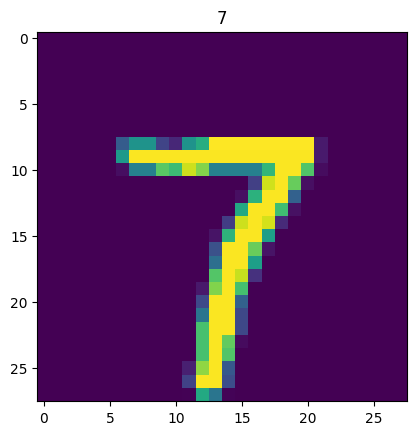

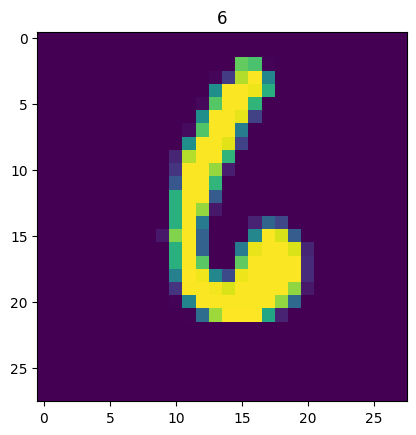

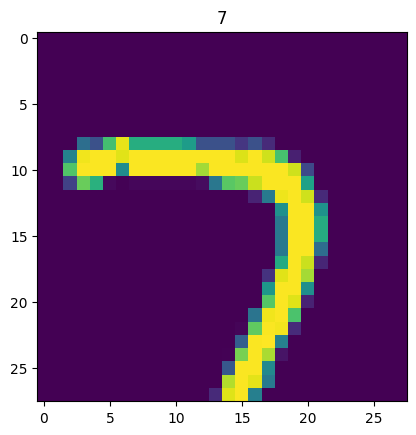

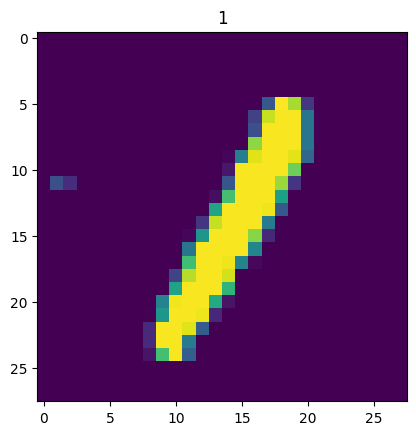

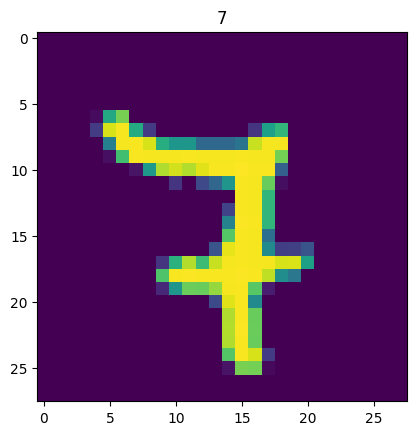

In [ ]:
# Plotting images
for index in np.random.randint(0,60000,5):
  plt.imshow(train_images[index,:,:])
  plt.title(train_labels[index])
  plt.show()

In [ ]:
# Apply preprocessing and encoding to labels
input_size = train_images.shape[1] * train_images.shape[2]
train_images = np.reshape(train_images, [-1, input_size])
train_images = train_images.astype('float32') / 255
test_images = np.reshape(test_images, [-1, input_size])
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_images.shape, train_images.shape

((60000, 784), (60000, 784))

ANN Model 1

In [ ]:
# Define the ANN model for image classification with normalization and skip connections
inputs = Input(shape=input_size)

# Layer 1: Dense layer with 64 units and ReLU activation
x = Dense(64, activation='relu')(inputs)

# Layer 2: Dense layer with 64 units and ReLU activation
z = Dense(64, activation='relu')(x)

# Batch normalization layer
x = BatchNormalization()(z)

# Layer 3: Dense layer with 32 units and ReLU activation
x = Dense(32, activation='relu')(x)

# Layer 4: Dense layer with 64 units and ReLU activation
x = Dense(64, activation='relu')(x)

# Skip connection, adding Layer 2 output to Layer 4
x = Add()([x, z])

# Layer 5: Dense layer with 32 units and ReLU activation
x = Dense(32, activation='relu')(x)

# Layer 6: Dense layer with 16 units and ReLU activation
z = Dense(16, activation='relu')(x)

# Batch normalization layer
x = BatchNormalization()(z)

# Layer 7: Dense layer with 16 units and ReLU activation
x = Dense(16, activation='relu')(x)

# Layer 8: Dense layer with 16 units and ReLU activation
x = Dense(16, activation='relu')(x)

# Skip connection, adding Layer 6 output to Layer 8
x = Add()([x, z])

# Output layer with 10 units (for 10 classes) and softmax activation
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)
model.summary()


# Define and compile Model 1
model1_variant1 = Model(inputs, outputs)
model1_variant1.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])

# Train Model 1 Variant 1
history_model1_variant1 = model1_variant1.fit(train_images, train_labels,
                                              validation_data=(test_images, test_labels),
                                              epochs=10,
                                              batch_size=32)


Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_90 (Dense)            (None, 64)                   50240     ['input_9[0][0]']             
                                                                                                  
 dense_91 (Dense)            (None, 64)                   4160      ['dense_90[0][0]']            
                                                                                                  
 batch_normalization_20 (Ba  (None, 64)                   256       ['dense_91[0][0]']            
 tchNormalization)                                                                         

ANN Model 2

In [ ]:
# Define  ANN model 2 for image classification with normalization and skip connections
# We use binary relevance to treat each class as an independent binary classification problem
inputs = Input(shape=input_size)

# Layer 1: Dense layer with 64 units and ReLU activation
x = Dense(64, activation='relu')(inputs)

# Layer 2: Dense layer with 64 units and ReLU activation
z = Dense(64, activation='relu')(x)

# Batch normalization layer
x = BatchNormalization()(z)

# Layer 3: Dense layer with 32 units and tanh activation
x = Dense(32, activation='tanh')(x)

# Layer 4: Dense layer with 64 units and ReLU activation
x = Dense(64, activation='relu')(x)

# Skip connection, adding Layer 2 output to Layer 4
x = Add()([x, z])

# Layer 5: Dense layer with 32 units and tanh activation
x = Dense(32, activation='tanh')(x)

# Layer 6: Dense layer with 16 units and ReLU activation
z = Dense(16, activation='relu')(x)

# Batch normalization layer
x = BatchNormalization()(z)

# Layer 7: Dense layer with 16 units and ReLU activation
x = Dense(16, activation='relu')(x)

# Layer 8: Dense layer with 16 units and ReLU activation
x = Dense(16, activation='relu')(x)

# Skip connection, adding Layer 6 output to Layer 8
x = Add()([x, z])

# Output layer with 10 units (for 10 classes) and sigmoid activation for multiclass classification
outputs = Dense(10, activation='sigmoid')(x)

# Create Model 2 with tanh activations
model2 = Model(inputs, outputs)
model2.summary()

# Compile Model 2 with binary cross-entropy loss and Adam optimizer for multiclass classification
model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])


Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 784)]                0         []                            
                                                                                                  
 dense_108 (Dense)           (None, 64)                   50240     ['input_11[0][0]']            
                                                                                                  
 dense_109 (Dense)           (None, 64)                   4160      ['dense_108[0][0]']           
                                                                                                  
 batch_normalization_24 (Ba  (None, 64)                   256       ['dense_109[0][0]']           
 tchNormalization)                                                                         

In [ ]:
# Fit the model2 on the training data
history2 = model2.fit(train_images, train_labels,
                      validation_data=(test_images, test_labels),
                      epochs=10,
                      batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0927 - accuracy: 0.8477 - val_loss: 0.0386 - val_accuracy: 0.9407
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0306 - accuracy: 0.9538 - val_loss: 0.0259 - val_accuracy: 0.9586
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9649 - val_loss: 0.0231 - val_accuracy: 0.9665
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0185 - accuracy: 0.9714 - val_loss: 0.0226 - val_accuracy: 0.9664
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0159 - accuracy: 0.9757 - val_loss: 0.0238 - val_accuracy: 0.9634
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0138 - accuracy: 0.9782 - val_loss: 0.0199 - val_accuracy: 0.9709
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9811 - val_loss: 0.0196 - val_accuracy:

ANN Model 3

In [ ]:
# Define the ANN model 3 for image classification with normalization and skip connections
#We use regression and linear activation function in last layer
inputs = Input(shape=input_size)

# Layer 1: Dense layer with 64 units and ReLU activation
x = Dense(64, activation='relu')(inputs)

# Layer 2: Dense layer with 64 units and ReLU activation
z = Dense(64, activation='relu')(x)

# Batch normalization layer
x = BatchNormalization()(z)

# Layer 3: Dense layer with 32 units and tanh activation
x = Dense(32, activation='tanh')(x)

# Layer 4: Dense layer with 64 units and ReLU activation
x = Dense(64, activation='relu')(x)

# Skip connection, adding Layer 2 output to Layer 4
x = Add()([x, z])

# Layer 5: Dense layer with 32 units and tanh activation
x = Dense(32, activation='tanh')(x)

# Layer 6: Dense layer with 16 units and ReLU activation
z = Dense(16, activation='relu')(x)

# Batch normalization layer
x = BatchNormalization()(z)

# Layer 7: Dense layer with 16 units and ReLU activation
x = Dense(16, activation='relu')(x)

# Layer 8: Dense layer with 16 units and ReLU activation
x = Dense(16, activation='relu')(x)

# Skip connection, adding Layer 6 output to Layer 8
x = Add()([x, z])

# Output layer with 1 unit (for 10 classes) using linear activation and regression
outputs = Dense(10, activation='linear')(x)

# Create Model 3 for regression
model3 = Model(inputs, outputs)
model3.summary()

# Compile Model 3 with mean squared error (MSE) loss and Adam optimizer for regression
model3.compile(loss='mean_squared_error',
               optimizer='adam',
               metrics=['accuracy'])

Model: "model_75"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 784)]                0         []                            
                                                                                                  
 dense_66 (Dense)            (None, 64)                   50240     ['input_12[0][0]']            
                                                                                                  
 dense_67 (Dense)            (None, 64)                   4160      ['dense_66[0][0]']            
                                                                                                  
 batch_normalization (Batch  (None, 64)                   256       ['dense_67[0][0]']            
 Normalization)                                                                            

In [ ]:
# Fit model3 for regression
history3 = model3.fit(train_images, train_labels,
                      validation_data=(test_images, test_labels),
                      epochs=10,
                      batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0296 - accuracy: 0.8455 - val_loss: 0.0106 - val_accuracy: 0.9415
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0094 - accuracy: 0.9488 - val_loss: 0.0080 - val_accuracy: 0.9530
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0071 - accuracy: 0.9597 - val_loss: 0.0061 - val_accuracy: 0.9657
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0057 - accuracy: 0.9669 - val_loss: 0.0055 - val_accuracy: 0.9673
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0050 - accuracy: 0.9706 - val_loss: 0.0065 - val_accuracy: 0.9615
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0044 - accuracy: 0.9742 - val_loss: 0.0046 - val_accuracy: 0.9729
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0039 - accuracy: 0.9777 - val_loss: 0.0046 - val_ac

Model 1 performance analysis with different batch sizes and learning rates

313/313 [==============================] - 0s 1ms/step


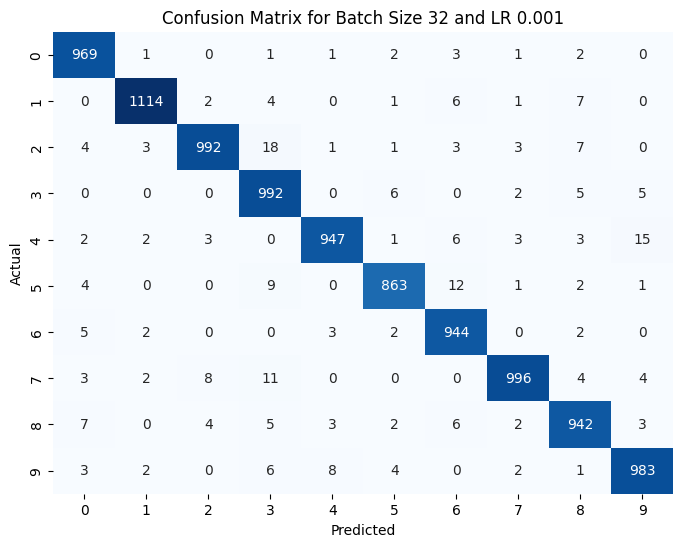

313/313 [==============================] - 0s 1ms/step


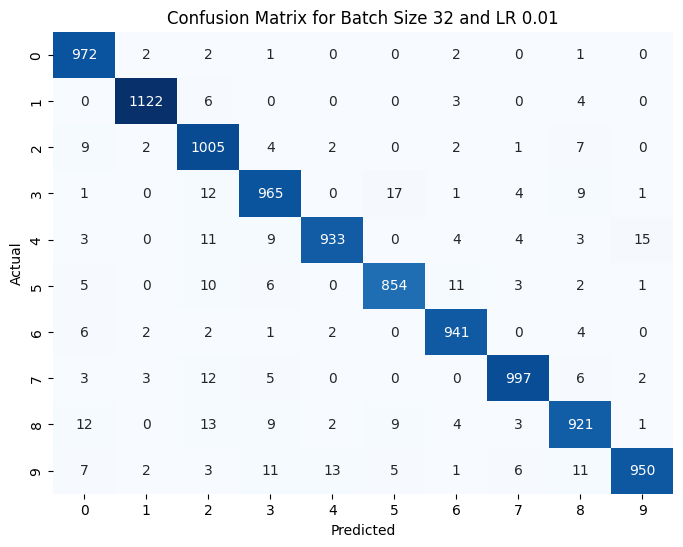

313/313 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


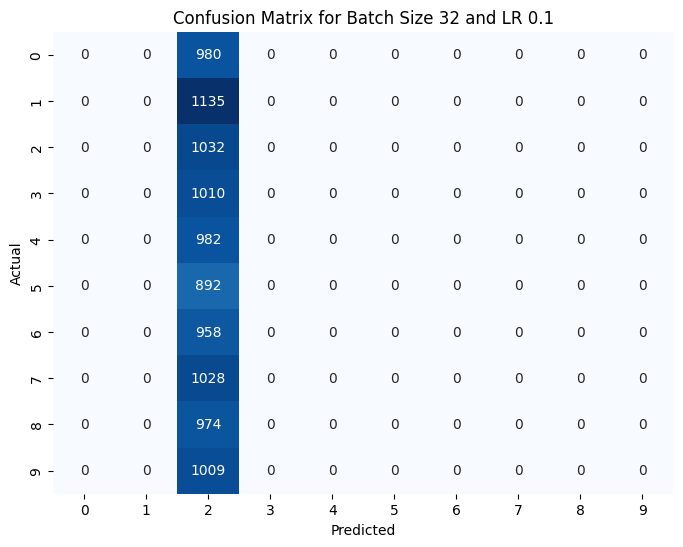

313/313 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


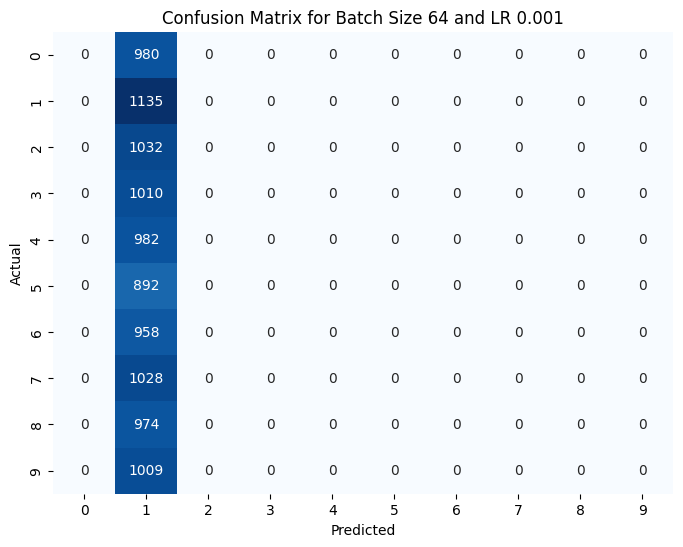

313/313 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


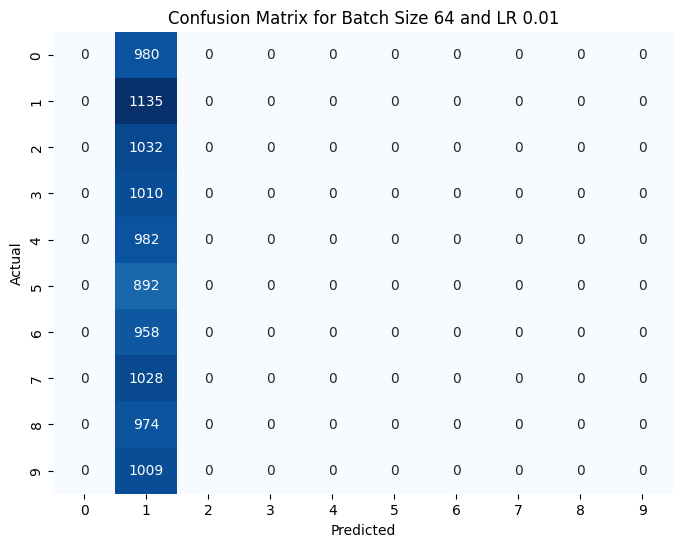

313/313 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


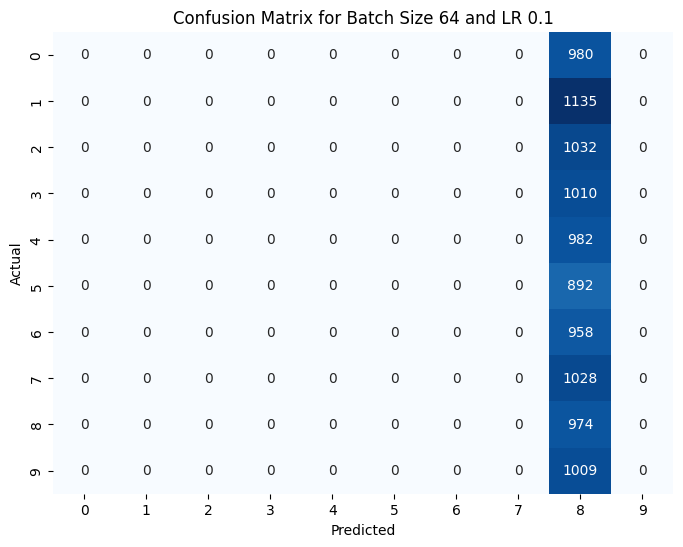

313/313 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


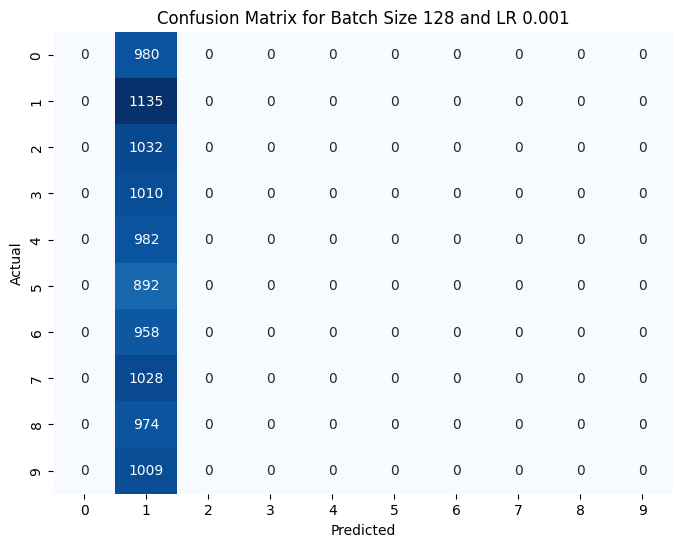

313/313 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


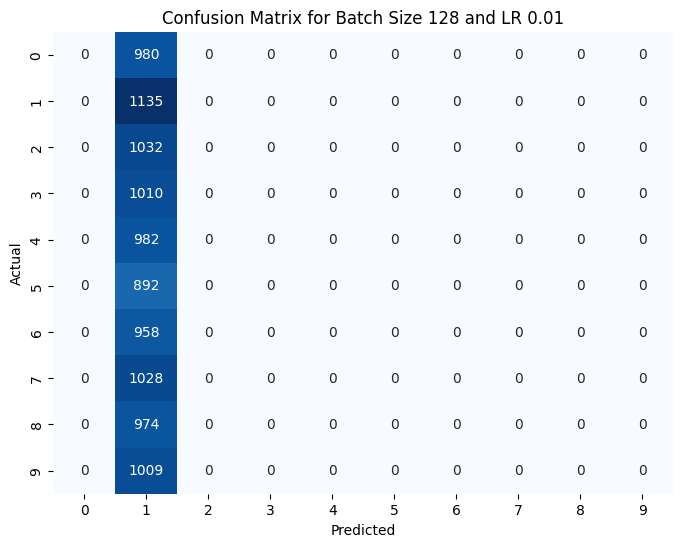

313/313 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


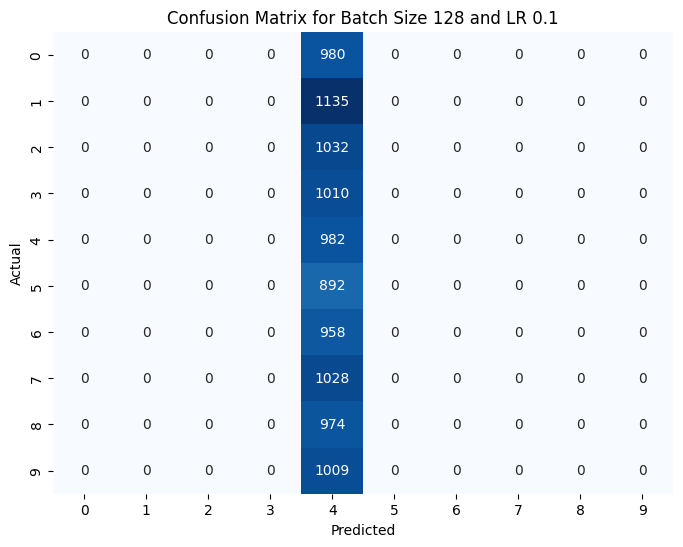

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Create lists to store results
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
results = []

# Initialize lists to store metrics data
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through combinations of batch sizes and learning rates
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        # Define and compile Model 1 with the current batch size and learning rate
        model1_variant = Model(inputs, outputs)
        model1_variant.compile(loss='categorical_crossentropy',
                               optimizer=Adam(learning_rate),
                               metrics=['accuracy'])

        # Train Model 1 Variant with the current batch size and learning rate
        history_model1_variant = model1_variant.fit(train_images, train_labels,
                                                    validation_data=(test_images, test_labels),
                                                    epochs=10,
                                                    batch_size=batch_size,
                                                    verbose=0)  # Set verbose to 0 to suppress training output

        # Store results in a dictionary
        result = {
            "Batch Size": batch_size,
            "Learning Rate": learning_rate,
            "Validation Accuracy": history_model1_variant.history['val_accuracy'],
            "Validation Loss": history_model1_variant.history['val_loss']
        }
        results.append(result)

        # Evaluate model on test data
        test_predictions = model1_variant.predict(test_images)

        # Calculate accuracy
        accuracy = history_model1_variant.history['val_accuracy'][-1]
        accuracy_scores.append(accuracy)

        # Calculate precision, recall, and F1-score
        test_labels_argmax = np.argmax(test_labels, axis=1)
        test_predictions_argmax = np.argmax(test_predictions, axis=1)
        classification_report_result = classification_report(test_labels_argmax, test_predictions_argmax, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'], output_dict=True)
        precision_scores.append(classification_report_result['weighted avg']['precision'])
        recall_scores.append(classification_report_result['weighted avg']['recall'])
        f1_scores.append(classification_report_result['weighted avg']['f1-score'])

        # Calculate confusion matrix
        cm = confusion_matrix(test_labels_argmax, test_predictions_argmax)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for Batch Size {batch_size} and LR {learning_rate}')
        plt.show()

Accuracy plotting

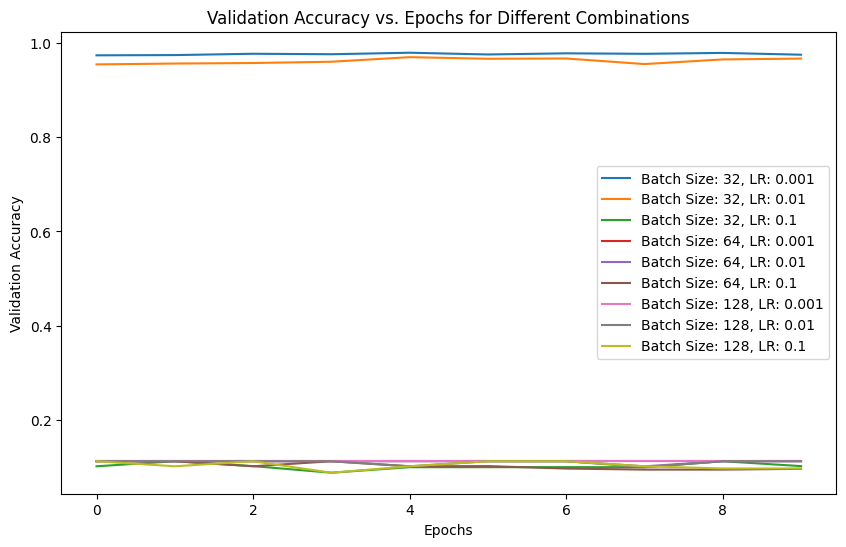

In [ ]:
#Plot accuracy
plt.figure(figsize=(10, 6))
for i, result in enumerate(results):
    label = f"Batch Size: {result['Batch Size']}, LR: {result['Learning Rate']}"
    plt.plot(result["Validation Accuracy"], label=label)

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Validation Accuracy vs. Epochs for Different Combinations")
plt.show()

Evaluating performance using accuracy, precision, recall, F1-score, and cnfusion matrices

In [ ]:
# Analyze precision, recall, and F1-score
for i, result in enumerate(results):
    label = f"Batch Size: {result['Batch Size']}, LR: {result['Learning Rate']}"
    print(f"Metrics for {label}:")
    print(f"Accuracy: {accuracy_scores[i]:.4f}")
    print(f"Precision: {precision_scores[i]:.4f}")
    print(f"Recall: {recall_scores[i]:.4f}")
    print(f"F1-Score: {f1_scores[i]:.4f}")
    print()

Metrics for Batch Size: 32, LR: 0.001:
Accuracy: 0.9742
Precision: 0.9744
Recall: 0.9742
F1-Score: 0.9742

Metrics for Batch Size: 32, LR: 0.01:
Accuracy: 0.9660
Precision: 0.9663
Recall: 0.9660
F1-Score: 0.9660

Metrics for Batch Size: 32, LR: 0.1:
Accuracy: 0.1032
Precision: 0.0107
Recall: 0.1032
F1-Score: 0.0193

Metrics for Batch Size: 64, LR: 0.001:
Accuracy: 0.1135
Precision: 0.0129
Recall: 0.1135
F1-Score: 0.0231

Metrics for Batch Size: 64, LR: 0.01:
Accuracy: 0.1135
Precision: 0.0129
Recall: 0.1135
F1-Score: 0.0231

Metrics for Batch Size: 64, LR: 0.1:
Accuracy: 0.0974
Precision: 0.0095
Recall: 0.0974
F1-Score: 0.0173

Metrics for Batch Size: 128, LR: 0.001:
Accuracy: 0.1135
Precision: 0.0129
Recall: 0.1135
F1-Score: 0.0231

Metrics for Batch Size: 128, LR: 0.01:
Accuracy: 0.1135
Precision: 0.0129
Recall: 0.1135
F1-Score: 0.0231

Metrics for Batch Size: 128, LR: 0.1:
Accuracy: 0.0982
Precision: 0.0096
Recall: 0.0982
F1-Score: 0.0176



We notice that smaller batch sizes (32) and lower learning rates (0.001 and 0.01) yield significantly better classification performance, with high accuracy, precision, recall, and F1-scores.

### CIFAR-10 Dataset

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

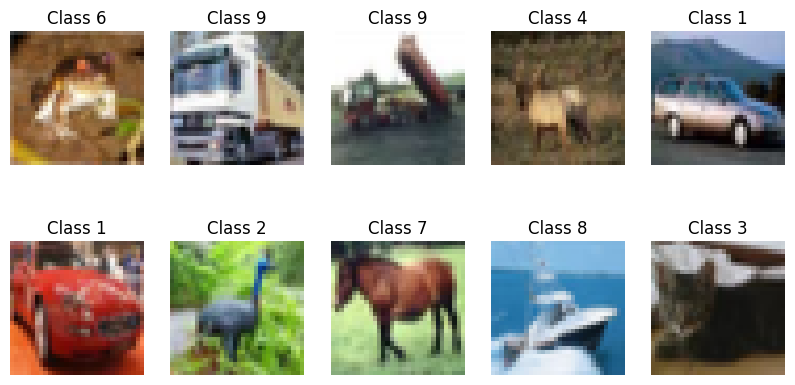

In [ ]:
# Visualizing some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Class {train_labels[i][0]}")
    plt.axis('off')
plt.show()

In [ ]:
# Reshape the images to a flat vector and normalize pixel values
input_size = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]
train_images = np.reshape(train_images, [-1, input_size]).astype('float32') / 255.0
test_images = np.reshape(test_images, [-1, input_size]).astype('float32') / 255.0

In [ ]:
train_images.shape, train_images.shape

((50000, 3072), (50000, 3072))

ANN Model 1

In [ ]:
# Define the ANN model 1 for image classification with normalization and skip connections
inputs = Input(shape=input_size)

# Layer 1: Dense layer with 64 units and ReLU activation
x = Dense(64, activation='relu')(inputs)

# Layer 2: Dense layer with 64 units and ReLU activation
z = Dense(64, activation='relu')(x)

# Batch normalization layer
x = BatchNormalization()(z)

# Layer 3: Dense layer with 32 units and ReLU activation
x = Dense(32, activation='relu')(x)

# Layer 4: Dense layer with 64 units and ReLU activation
x = Dense(64, activation='relu')(x)

# Skip connection, adding Layer 2 output to Layer 4
x = Add()([x, z])

# Layer 5: Dense layer with 32 units and ReLU activation
x = Dense(32, activation='relu')(x)

# Layer 6: Dense layer with 16 units and ReLU activation
z = Dense(16, activation='relu')(x)

# Batch normalization layer
x = BatchNormalization()(z)

# Layer 7: Dense layer with 16 units and ReLU activation
x = Dense(16, activation='relu')(x)

# Layer 8: Dense layer with 16 units and ReLU activation
x = Dense(16, activation='relu')(x)

# Skip connection, adding Layer 6 output to Layer 8
x = Add()([x, z])

# Output layer with 10 units (for 10 classes) and softmax activation
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)
model.summary()

# Define and compile Model 1
model1_variant1.compile(loss='sparse_categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])
# Train Model 1 Variant 1
history_model1_variant1 = model1_variant1.fit(train_images, train_labels,
                                              validation_data=(test_images, test_labels),
                                              epochs=10,
                                              batch_size=32)

Model: "model_40"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 3072)]               0         []                            
                                                                                                  
 dense_153 (Dense)           (None, 64)                   196672    ['input_16[0][0]']            
                                                                                                  
 dense_154 (Dense)           (None, 64)                   4160      ['dense_153[0][0]']           
                                                                                                  
 batch_normalization_34 (Ba  (None, 64)                   256       ['dense_154[0][0]']           
 tchNormalization)                                                                         

Model 1 performance analysis with different batch sizes and learning rates

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


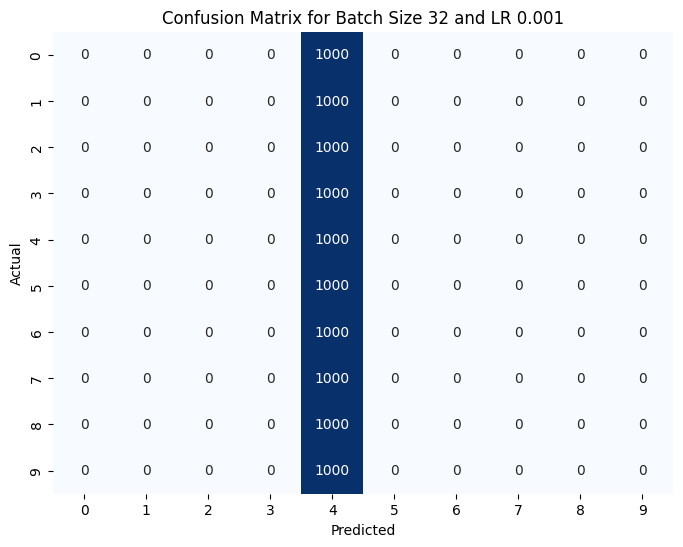

313/313 [==============================] - 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


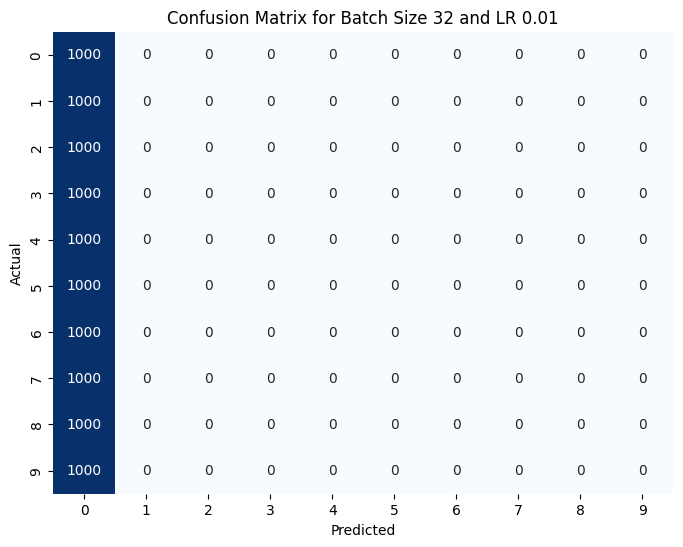

313/313 [==============================] - 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


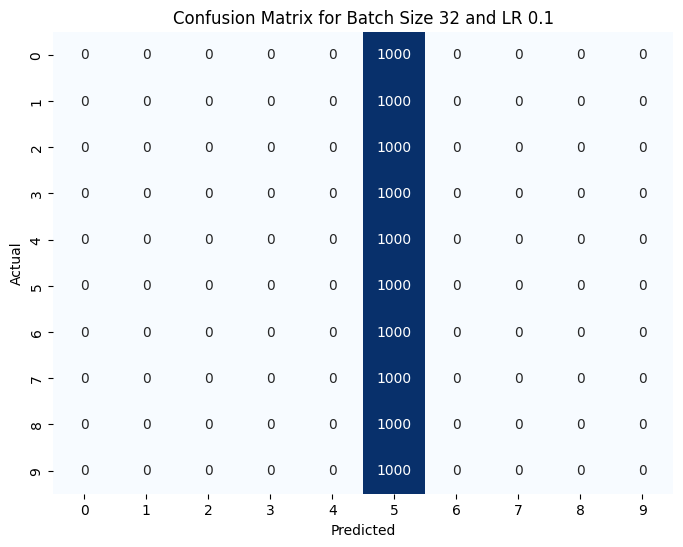

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


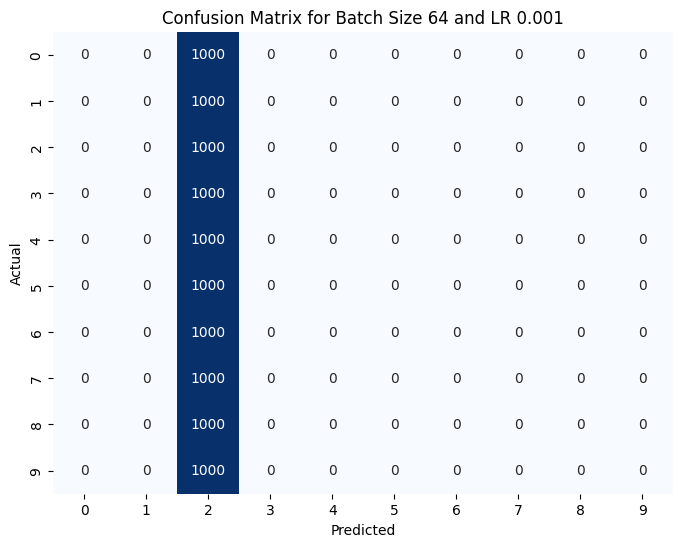

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


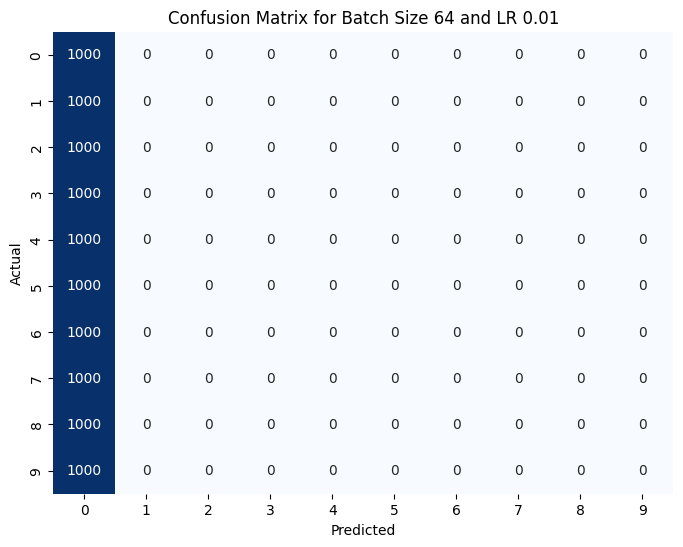

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


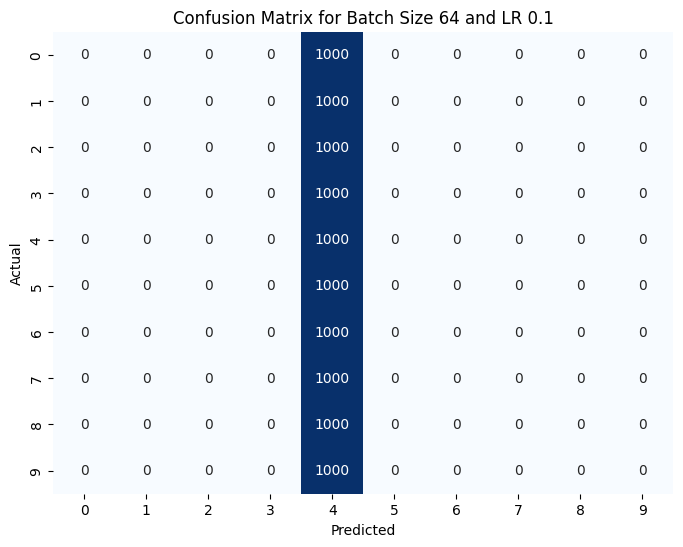

313/313 [==============================] - 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


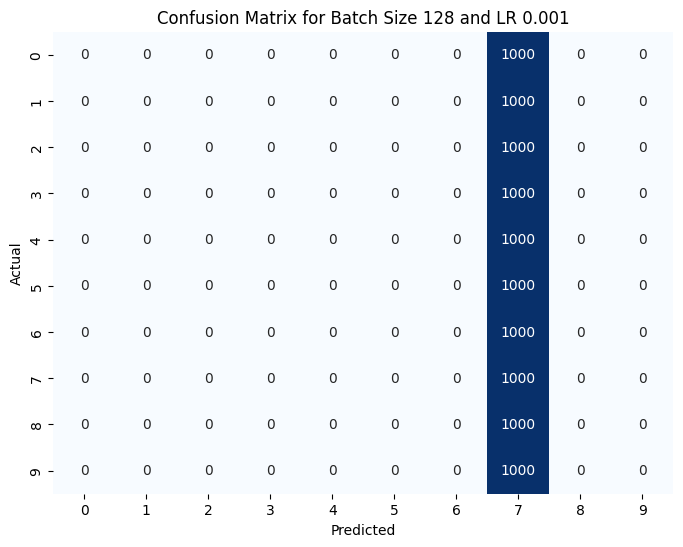

313/313 [==============================] - 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


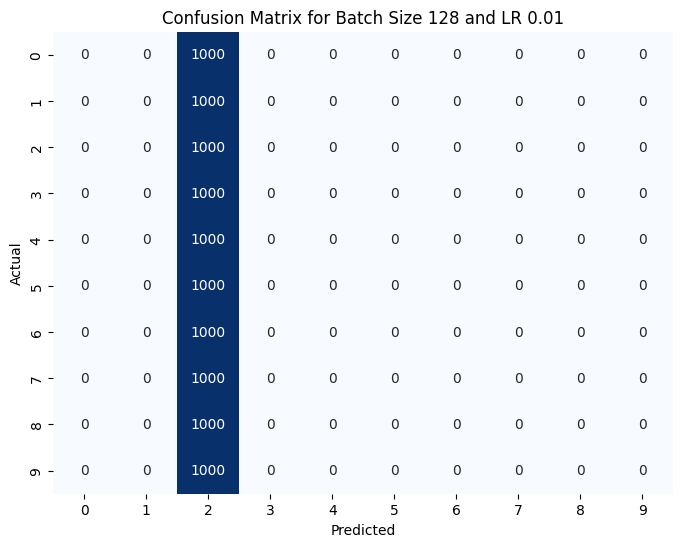

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


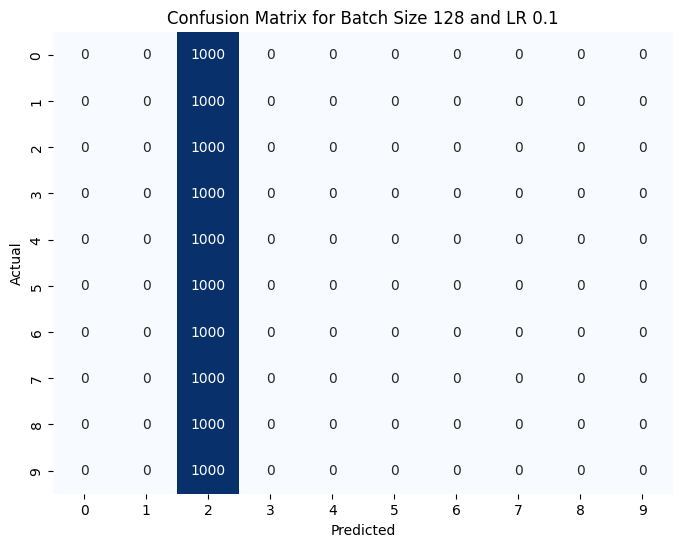

In [ ]:
# Create lists to store results
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
results = []

# Initialize lists to store metrics data
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Update target names to include all 10 classes
target_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Loop through combinations of batch sizes and learning rates
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        # Define and compile Model 1 with the current batch size and learning rate
        model1_variant = Model(inputs, outputs)
        model1_variant.compile(loss='sparse_categorical_crossentropy',
                               optimizer=Adam(learning_rate),
                               metrics=['accuracy'])

        # Train Model 1 Variant with the current batch size and learning rate
        history_model1_variant = model1_variant.fit(train_images, train_labels,
                                                    validation_data=(test_images, test_labels),
                                                    epochs=10,
                                                    batch_size=batch_size,
                                                    verbose=0)  # Set verbose to 0 to suppress training output

        # Store results in a dictionary
        result = {
            "Batch Size": batch_size,
            "Learning Rate": learning_rate,
            "Validation Accuracy": history_model1_variant.history['val_accuracy'],
            "Validation Loss": history_model1_variant.history['val_loss']
        }
        results.append(result)

        # Evaluate model on test data
        test_predictions = model1_variant.predict(test_images)

        # Calculate accuracy
        accuracy = history_model1_variant.history['val_accuracy'][-1]
        accuracy_scores.append(accuracy)

        # Calculate precision, recall, and F1-score
        classification_report_result = classification_report(
            test_labels, np.argmax(test_predictions, axis=1),
            target_names=target_names, output_dict=True
        )
        precision_scores.append(classification_report_result['weighted avg']['precision'])
        recall_scores.append(classification_report_result['weighted avg']['recall'])
        f1_scores.append(classification_report_result['weighted avg']['f1-score'])

        # Calculate confusion matrix
        cm = confusion_matrix(test_labels, np.argmax(test_predictions, axis=1))

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for Batch Size {batch_size} and LR {learning_rate}')
        plt.show()

Accuracy Plotting

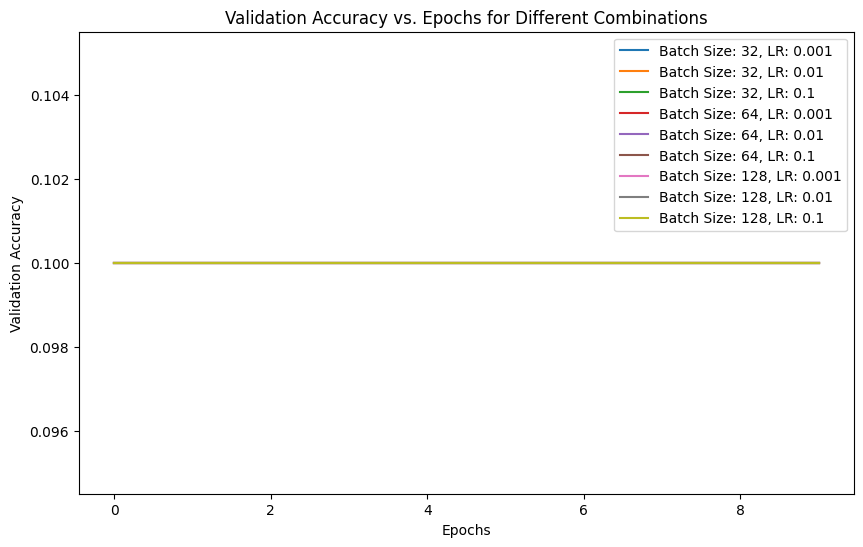

In [ ]:
#Plot accuracy
plt.figure(figsize=(10, 6))
for i, result in enumerate(results):
    label = f"Batch Size: {result['Batch Size']}, LR: {result['Learning Rate']}"
    plt.plot(result["Validation Accuracy"], label=label)

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Validation Accuracy vs. Epochs for Different Combinations")
plt.show()

Evaluating performance using accuracy, precision, recall, F1-score, and cnfusion matrices

In [ ]:
# Analyze precision, recall, and F1-score
for i, result in enumerate(results):
    label = f"Batch Size: {result['Batch Size']}, LR: {result['Learning Rate']}"
    print(f"Metrics for {label}:")
    print(f"Accuracy: {accuracy_scores[i]:.4f}")
    print(f"Precision: {precision_scores[i]:.4f}")
    print(f"Recall: {recall_scores[i]:.4f}")
    print(f"F1-Score: {f1_scores[i]:.4f}")
    print()

Metrics for Batch Size: 32, LR: 0.001:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 32, LR: 0.01:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 32, LR: 0.1:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 64, LR: 0.001:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 64, LR: 0.01:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 64, LR: 0.1:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 128, LR: 0.001:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 128, LR: 0.01:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 128, LR: 0.1:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182



Its overfitting hence we add drouput

Model: "model_75"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_18 (InputLayer)       [(None, 3072)]               0         []                            
                                                                                                  
 dense_170 (Dense)           (None, 128)                  393344    ['input_18[0][0]']            
                                                                                                  
 dropout_4 (Dropout)         (None, 128)                  0         ['dense_170[0][0]']           
                                                                                                  
 dense_171 (Dense)           (None, 64)                   8256      ['dropout_4[0][0]']           
                                                                                           

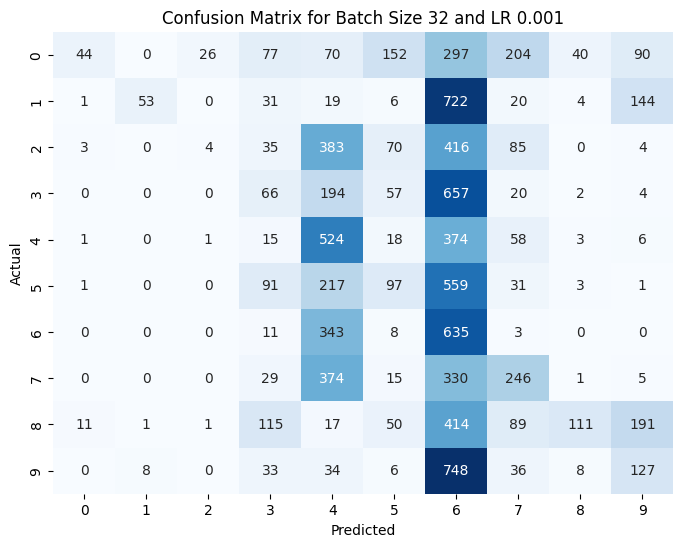

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


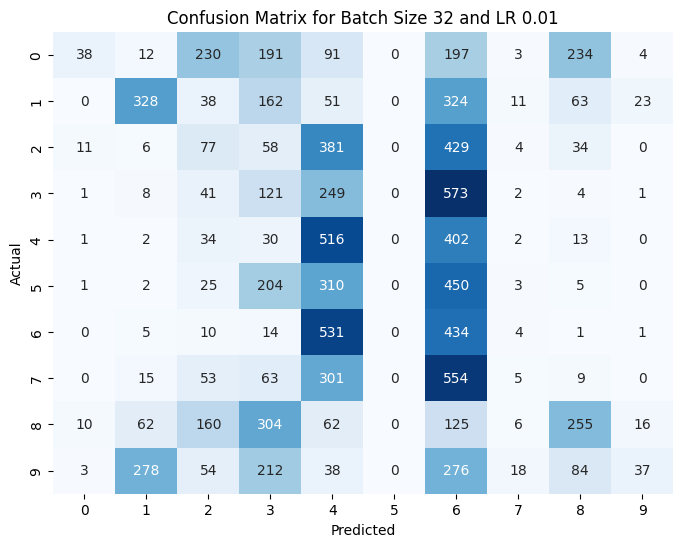

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


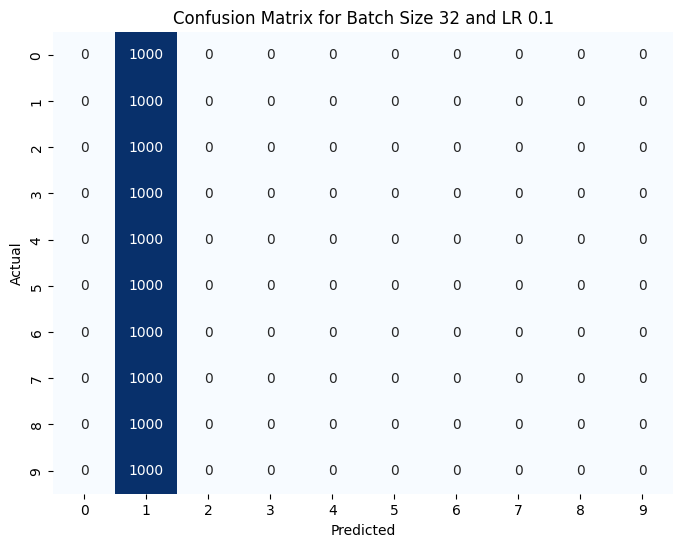

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


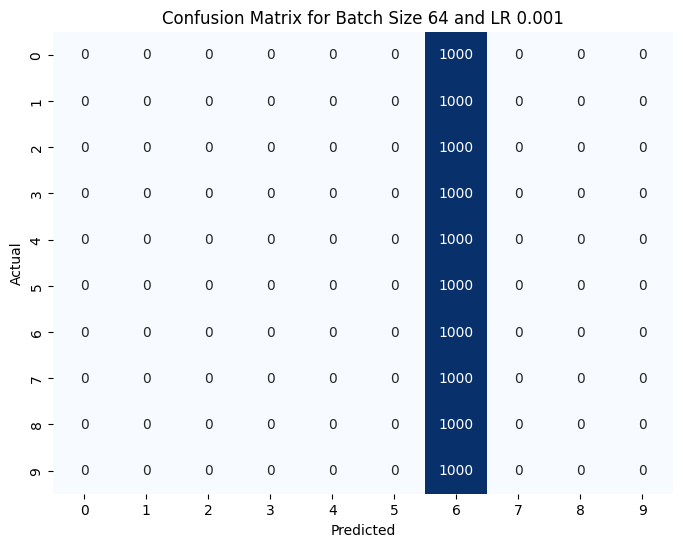

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


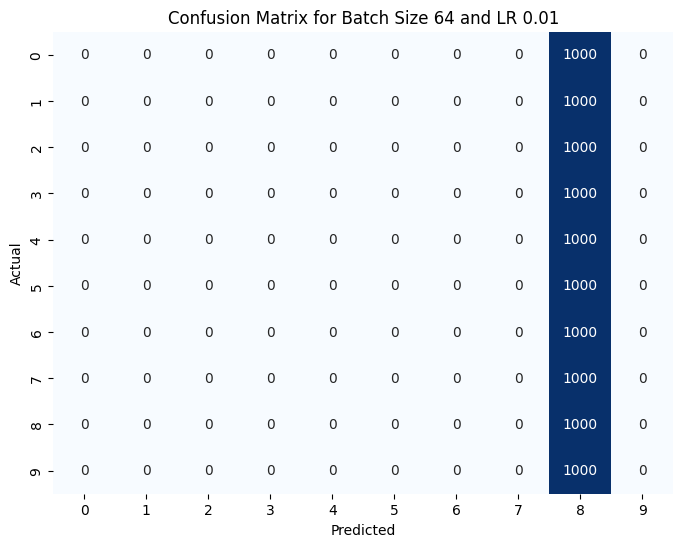

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


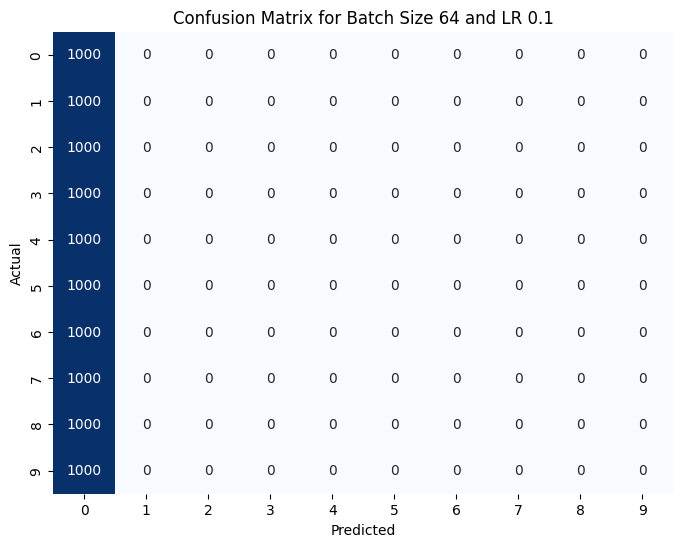

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


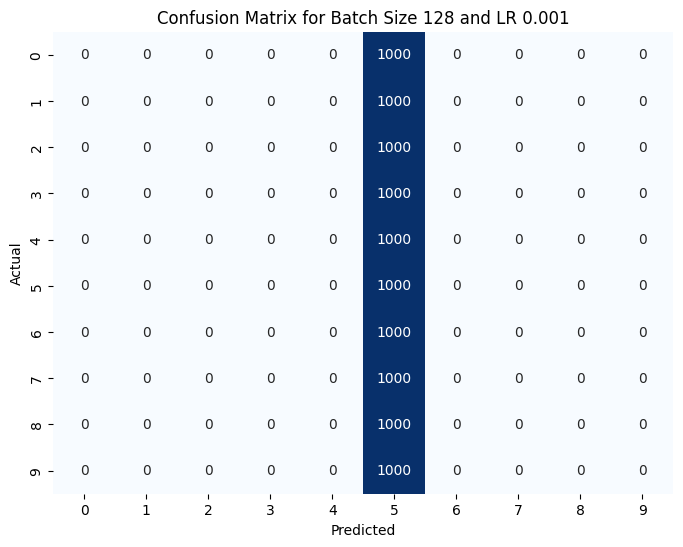

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


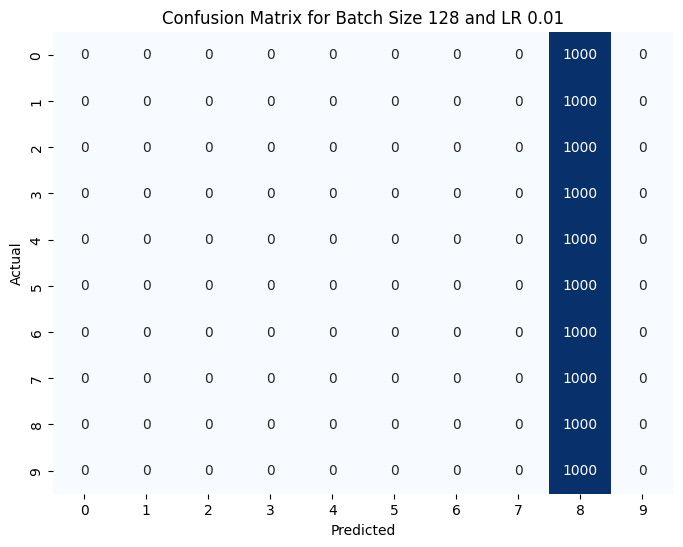

313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


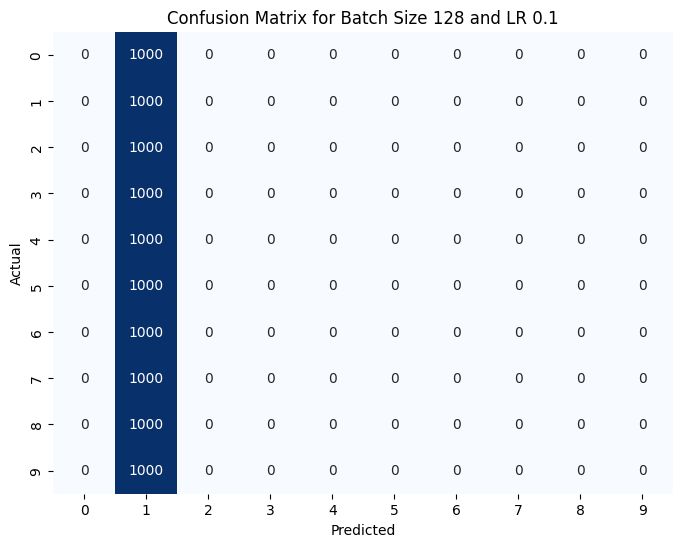

Metrics for Batch Size: 32, LR: 0.001:
Accuracy: 0.1907
Precision: 0.3577
Recall: 0.1907
F1-Score: 0.1572

Metrics for Batch Size: 32, LR: 0.01:
Accuracy: 0.1811
Precision: 0.2457
Recall: 0.1811
F1-Score: 0.1497

Metrics for Batch Size: 32, LR: 0.1:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 64, LR: 0.001:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 64, LR: 0.01:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 64, LR: 0.1:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 128, LR: 0.001:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 128, LR: 0.01:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182

Metrics for Batch Size: 128, LR: 0.1:
Accuracy: 0.1000
Precision: 0.0100
Recall: 0.1000
F1-Score: 0.0182



In [ ]:
# Define the ANN model with improvements
inputs = Input(shape=input_size)

x = Dense(128, activation='relu')(inputs)
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting

z = Dense(64, activation='relu')(x)
x = BatchNormalization()(z)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Add()([x, z])

x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

z = Dense(16, activation='relu')(x)
x = BatchNormalization()(z)

x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)

x = Add()([x, z])

outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs, outputs)
model.summary()

# Define and compile Model 1 with improvements
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Create lists to store results
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
results = []

# Initialize lists to store metrics data
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through combinations of batch sizes and learning rates
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        # Define and compile Model 1 with the current batch size and learning rate
        model_variant = Model(inputs, outputs)
        model_variant.compile(loss='sparse_categorical_crossentropy',
                              optimizer=Adam(learning_rate),
                              metrics=['accuracy'])

        # Train Model 1 Variant with the current batch size and learning rate
        history_model_variant = model_variant.fit(train_images, train_labels,
                                                  validation_data=(test_images, test_labels),
                                                  epochs=50,  # Train for more epochs
                                                  batch_size=batch_size,
                                                  verbose=0)

        # Store results in a dictionary
        result = {
            "Batch Size": batch_size,
            "Learning Rate": learning_rate,
            "Validation Accuracy": history_model_variant.history['val_accuracy'],
            "Validation Loss": history_model_variant.history['val_loss']
        }
        results.append(result)

        # Evaluate model on test data
        test_predictions = model_variant.predict(test_images)

        # Calculate accuracy
        accuracy = history_model_variant.history['val_accuracy'][-1]
        accuracy_scores.append(accuracy)

        # Calculate precision, recall, and F1-score
        target_names = [
            'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
            'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
        ]
        classification_report_result = classification_report(
            test_labels, np.argmax(test_predictions, axis=1),
            target_names=target_names, output_dict=True
        )
        precision_scores.append(classification_report_result['weighted avg']['precision'])
        recall_scores.append(classification_report_result['weighted avg']['recall'])
        f1_scores.append(classification_report_result['weighted avg']['f1-score'])

        # Calculate confusion matrix
        cm = confusion_matrix(test_labels, np.argmax(test_predictions, axis=1))

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for Batch Size {batch_size} and LR {learning_rate}')
        plt.show()

# Print the metrics for all combinations
for i, result in enumerate(results):
    print(f"Metrics for Batch Size: {result['Batch Size']}, LR: {result['Learning Rate']}:")
    print(f"Accuracy: {accuracy_scores[i]:.4f}")
    print(f"Precision: {precision_scores[i]:.4f}")
    print(f"Recall: {recall_scores[i]:.4f}")
    print(f"F1-Score: {f1_scores[i]:.4f}")
    print()


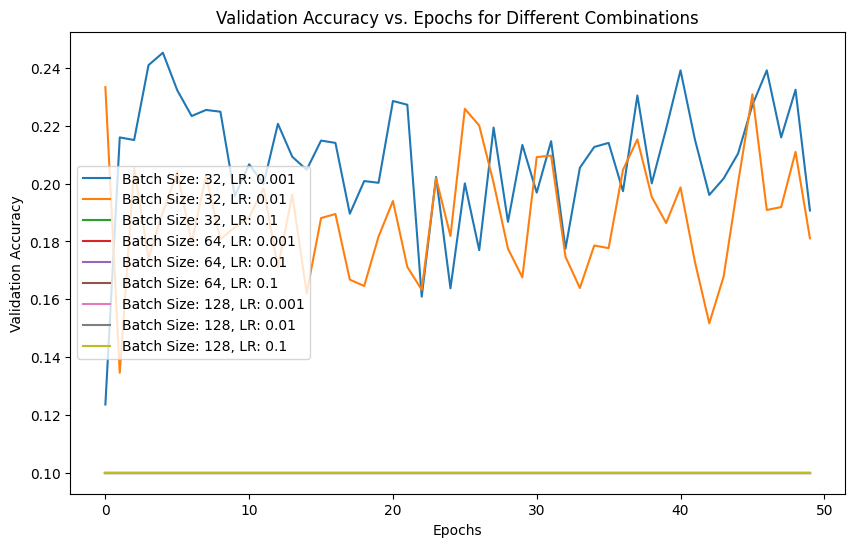

In [ ]:
#Plot accuracy
plt.figure(figsize=(10, 6))
for i, result in enumerate(results):
    label = f"Batch Size: {result['Batch Size']}, LR: {result['Learning Rate']}"
    plt.plot(result["Validation Accuracy"], label=label)

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Validation Accuracy vs. Epochs for Different Combinations")
plt.show()

We are trying to improve the model furthur

Epoch 1/50
782/782 [==============================] - 8s 8ms/step - loss: 5.1946 - accuracy: 0.2340 - val_loss: 4.5427 - val_accuracy: 0.2513
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 3.9795 - accuracy: 0.3200 - val_loss: 3.7000 - val_accuracy: 0.2850
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 3.2791 - accuracy: 0.3589 - val_loss: 3.0352 - val_accuracy: 0.3721
Epoch 4/50
782/782 [==============================] - 4s 6ms/step - loss: 2.8556 - accuracy: 0.3846 - val_loss: 2.7134 - val_accuracy: 0.3959
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 2.5925 - accuracy: 0.4036 - val_loss: 2.4982 - val_accuracy: 0.4093
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 2.4214 - accuracy: 0.4155 - val_loss: 2.3877 - val_accuracy: 0.3989
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 2.2891 - accuracy: 0.4259 - val_loss: 2.3551 - val_accuracy: 0.3767
Epoch 

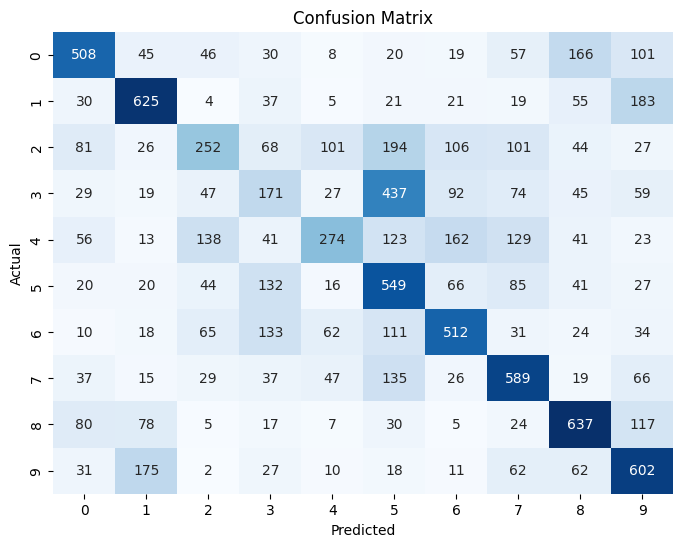

Accuracy: 0.4719
Precision: 0.4706
Recall: 0.4719
F1-Score: 0.4618


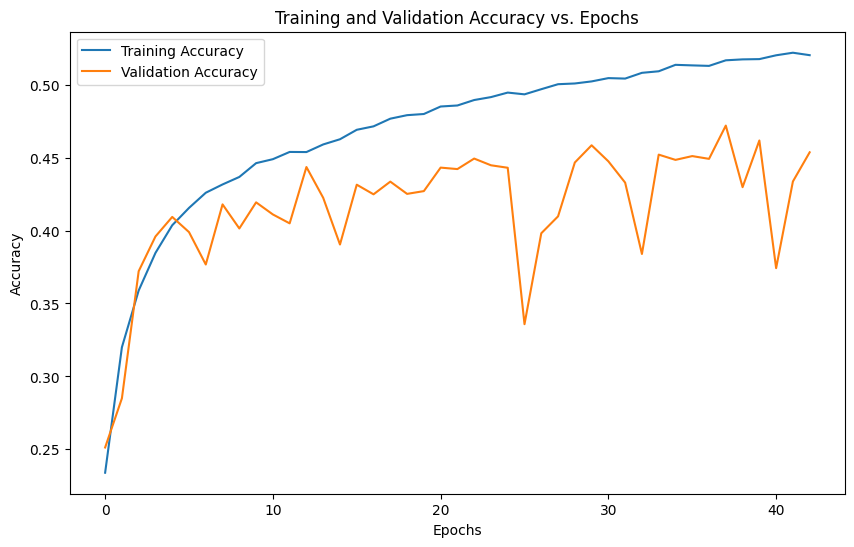

In [ ]:
#Trying another architecture
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(inputs)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Add()([x, x])  # Adding skip connection
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)
z = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(z)
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Add()([x, z])  # Adding skip connection
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping], verbose=1)

# Generate confusion matrix
test_predictions = model.predict(test_images)
cm = confusion_matrix(test_labels, np.argmax(test_predictions, axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
classification_report_result = classification_report(
    test_labels, np.argmax(test_predictions, axis=1),
    target_names=target_names, output_dict=True
)
accuracy = classification_report_result['accuracy']
precision = classification_report_result['weighted avg']['precision']
recall = classification_report_result['weighted avg']['recall']
f1_score = classification_report_result['weighted avg']['f1-score']
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1_score:.4f}')

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy vs. Epochs')
plt.show()

The model seems to overfit when we increased learning rate and batch size. It doesnt seem to show much accuracy when we reduced learning rates.

### Auto-mpg dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')
df1.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
print(df1.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
# Separate features and target variable
X = df1.drop(columns=['mpg'])  # Assuming "mpg" is the target variable
y = df1['mpg']

# Selecting top correlated features with 'mpg'
correlation_matrix = X.corrwith(y)
top_correlated_cols = correlation_matrix.abs().sort_values(ascending=False).index[:4]
X = X[top_correlated_cols]

# Label encoding for categorical features
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Min-max scaling for numeric features
scaler = MinMaxScaler()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Min-max scaling for the target variable
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<ipython-input-26-090ac84fd40f>:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corrwith(y)


Specifying different learning rates and batch sizes to run the model

In [ ]:
# Define different batch sizes and learning rates to test
batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.01, 0.1]

# Create lists to store results
mse_results = []
mae_results = []
rmse_results = []

# Define the input layer based on the number of features
input_layer = Input(shape=(4,))

# Hidden layers
hidden_1 = Dense(10, activation='relu')(input_layer)
hidden_2 = Dense(4, activation='relu')(hidden_1)

# Add the first skip connection by adding the input layer to hidden_2
skip_connection_1 = Add()([input_layer, hidden_2])

# Additional hidden layers
hidden_3 = Dense(10, activation='relu')(skip_connection_1)
hidden_4 = Dense(10, activation='relu')(hidden_3)
hidden_5 = Dense(10, activation='relu')(hidden_4)

# Add the second skip connection by adding hidden_4 to hidden_5
skip_connection_2 = Add()([hidden_4, hidden_5])

# Output layer (you can adjust the number of units based on your task)
output_layer = Dense(1)(skip_connection_2)

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        # Create the model
        model = Model(inputs=[input_layer], outputs=[output_layer])

        # Compile the model with mean squared error loss and the Adam optimizer
        model.compile(loss='mean_squared_error',
                      optimizer='adam',
                      metrics=['mae'])

        # Train the model with the specified batch size and learning rate
        history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size,
                            validation_data=(x_test, y_test), verbose=0)

        # Evaluate the model on test data
        test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)

        # Calculate RMSE (Root Mean Squared Error)
        test_rmse = np.sqrt(test_loss)

        # Append results to respective lists
        mse_results.append((batch_size, learning_rate, test_loss))
        mae_results.append((batch_size, learning_rate, test_mae))
        rmse_results.append((batch_size, learning_rate, test_rmse))

# Display the results
print("MSE Results:")
for batch_size, learning_rate, mse in mse_results:
    print(f"Batch Size: {batch_size}, Learning Rate: {learning_rate}, MSE: {mse:.4f}")

print("\nMAE Results:")
for batch_size, learning_rate, mae in mae_results:
    print(f"Batch Size: {batch_size}, Learning Rate: {learning_rate}, MAE: {mae:.4f}")

print("\nRMSE Results:")
for batch_size, learning_rate, rmse in rmse_results:
    print(f"Batch Size: {batch_size}, Learning Rate: {learning_rate}, RMSE: {rmse:.4f}")


MSE Results:
Batch Size: 16, Learning Rate: 0.001, MSE: 0.0058
Batch Size: 16, Learning Rate: 0.01, MSE: 0.0049
Batch Size: 16, Learning Rate: 0.1, MSE: 0.0059
Batch Size: 32, Learning Rate: 0.001, MSE: 0.0048
Batch Size: 32, Learning Rate: 0.01, MSE: 0.0053
Batch Size: 32, Learning Rate: 0.1, MSE: 0.0048
Batch Size: 64, Learning Rate: 0.001, MSE: 0.0048
Batch Size: 64, Learning Rate: 0.01, MSE: 0.0047
Batch Size: 64, Learning Rate: 0.1, MSE: 0.0046

MAE Results:
Batch Size: 16, Learning Rate: 0.001, MAE: 0.0585
Batch Size: 16, Learning Rate: 0.01, MAE: 0.0526
Batch Size: 16, Learning Rate: 0.1, MAE: 0.0572
Batch Size: 32, Learning Rate: 0.001, MAE: 0.0534
Batch Size: 32, Learning Rate: 0.01, MAE: 0.0553
Batch Size: 32, Learning Rate: 0.1, MAE: 0.0525
Batch Size: 64, Learning Rate: 0.001, MAE: 0.0517
Batch Size: 64, Learning Rate: 0.01, MAE: 0.0513
Batch Size: 64, Learning Rate: 0.1, MAE: 0.0503

RMSE Results:
Batch Size: 16, Learning Rate: 0.001, RMSE: 0.0760
Batch Size: 16, Learning 

Model architecture

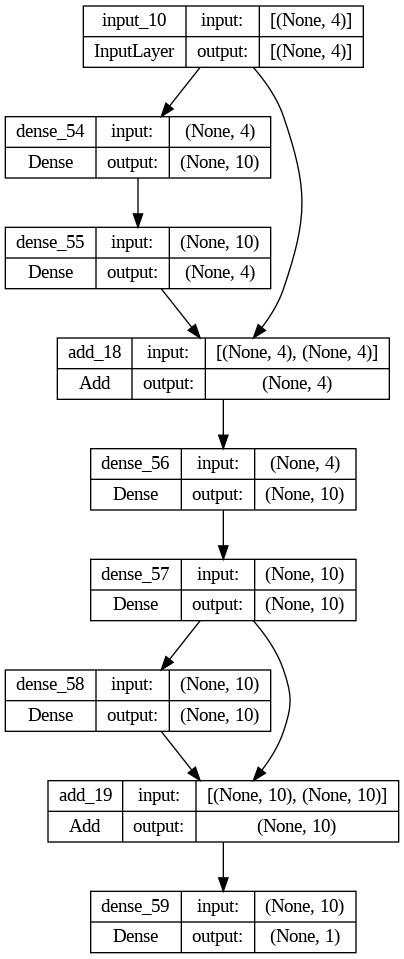

In [ ]:
plot_model(model, show_shapes=True)

Executing model again by plotting the metrics(MSE,MAE and RMSE)

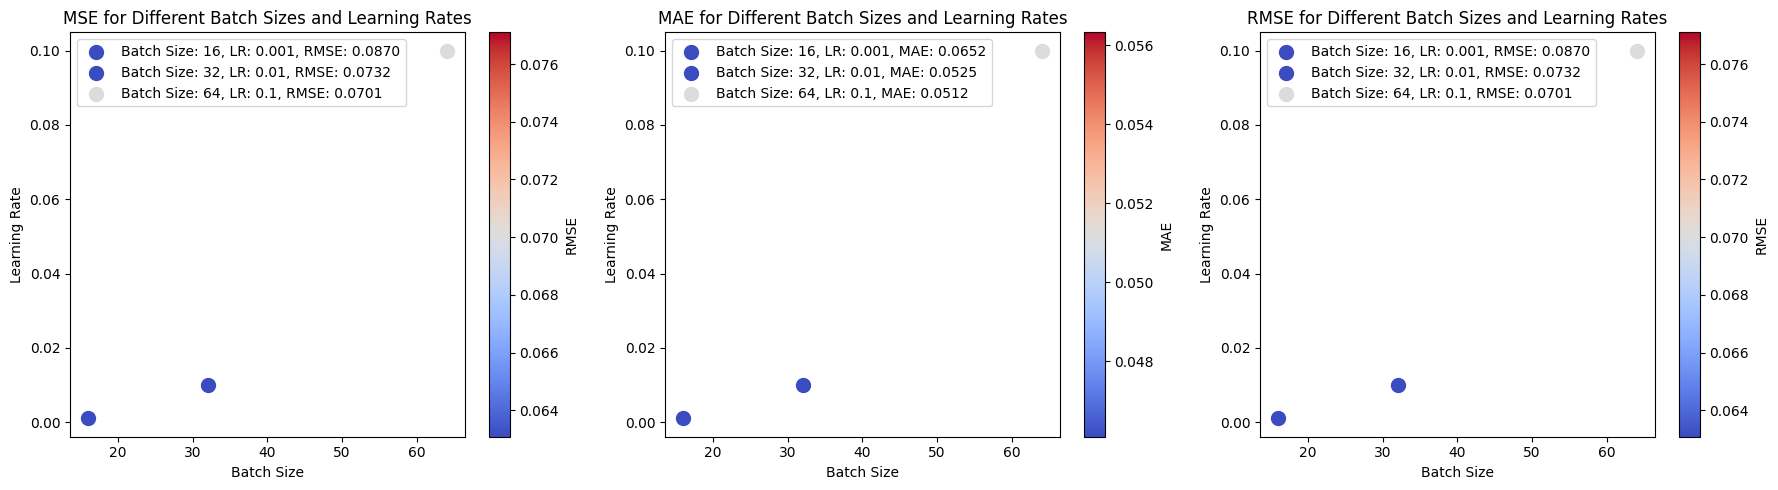

In [ ]:
# Define different batch sizes and learning rates to test
batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.01, 0.1]

# Create lists to store results
mse_results = []
mae_results = []
rmse_results = []

# Define the input layer based on the number of features
input_layer = Input(shape=(4,))

# Hidden layers
hidden_1 = Dense(10, activation='relu')(input_layer)
hidden_2 = Dense(4, activation='relu')(hidden_1)

# Add the first skip connection by adding the input layer to hidden_2
skip_connection_1 = Add()([input_layer, hidden_2])

# Additional hidden layers
hidden_3 = Dense(10, activation='relu')(skip_connection_1)
hidden_4 = Dense(10, activation='relu')(hidden_3)
hidden_5 = Dense(10, activation='relu')(hidden_4)

# Add the second skip connection by adding hidden_4 to hidden_5
skip_connection_2 = Add()([hidden_4, hidden_5])

# Output layer (you can adjust the number of units based on your task)
output_layer = Dense(1)(skip_connection_2)

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        # Create the model
        model = Model(inputs=[input_layer], outputs=[output_layer])

        # Compile the model with mean squared error loss and the Adam optimizer
        model.compile(loss='mean_squared_error',
                      optimizer='adam',
                      metrics=['mae'])

        # Train the model with the specified batch size and learning rate
        history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size,
                            validation_data=(x_test, y_test), verbose=0)

        # Evaluate the model on test data
        test_loss, test_mae = model.evaluate(x_test, y_test, verbose=0)

        # Calculate RMSE (Root Mean Squared Error)
        test_rmse = np.sqrt(test_loss)

        # Append results to respective lists
        mse_results.append((batch_size, learning_rate, test_loss))
        mae_results.append((batch_size, learning_rate, test_mae))
        rmse_results.append((batch_size, learning_rate, test_rmse))

# Separate the results into separate lists for each metric
batch_sizes_mse = []
learning_rates_mse = []
mse_values = []

batch_sizes_mae = []
learning_rates_mae = []
mae_values = []

batch_sizes_rmse = []
learning_rates_rmse = []
rmse_values = []

for batch_size, learning_rate, mse, mae, rmse in zip(batch_sizes, learning_rates, mse_results, mae_results, rmse_results):
    batch_sizes_mse.append(batch_size)
    learning_rates_mse.append(learning_rate)
    mse_values.append(mse[2])

    batch_sizes_mae.append(batch_size)
    learning_rates_mae.append(learning_rate)
    mae_values.append(mae[2])

    batch_sizes_rmse.append(batch_size)
    learning_rates_rmse.append(learning_rate)
    rmse_values.append(rmse[2])

# Define a diverging colormap (coolwarm) for better contrast
colormap = plt.get_cmap('coolwarm')

# Create subplots for each metric
plt.figure(figsize=(18, 5))

# MSE Plot
plt.subplot(131)
for batch_size, learning_rate, rmse in zip(batch_sizes_mse, learning_rates_mse, rmse_values):
    plt.scatter([batch_size], [learning_rate], c=[rmse], cmap='coolwarm', marker='o', s=100, label=f'Batch Size: {batch_size}, LR: {learning_rate}, RMSE: {rmse:.4f}')
plt.colorbar(label='RMSE')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.title('MSE for Different Batch Sizes and Learning Rates')
plt.legend()

# MAE Plot
plt.subplot(132)
for batch_size, learning_rate, mae in zip(batch_sizes_mae, learning_rates_mae, mae_values):
    plt.scatter([batch_size], [learning_rate], c=[mae], cmap='coolwarm', marker='o', s=100, label=f'Batch Size: {batch_size}, LR: {learning_rate}, MAE: {mae:.4f}')
plt.colorbar(label='MAE')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.title('MAE for Different Batch Sizes and Learning Rates')
plt.legend()

# RMSE Plot
plt.subplot(133)
for batch_size, learning_rate, rmse in zip(batch_sizes_rmse, learning_rates_rmse, rmse_values):
    plt.scatter([batch_size], [learning_rate], c=[rmse], cmap='coolwarm', marker='o', s=100, label=f'Batch Size: {batch_size}, LR: {learning_rate}, RMSE: {rmse:.4f}')
plt.colorbar(label='RMSE')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.title('RMSE for Different Batch Sizes and Learning Rates')
plt.legend()

plt.tight_layout()
plt.show()

We can notice that as we were increasing learning rates and batch sizes they are tending to result in slightly lower MSE, MAE, and RMSE values, indicating better model performance.